In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data=pd.read_csv('fulldata.csv')

In [27]:
data.describe()


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,111251.000000,111251.000000,111251.000000,111251.000000,111251.000000,111251.000000,111251.000000,111251.000000,111251.000000,111251.000000,111251.000000,111251.000000
mean,75023.200780,0.059613,0.311408,51.631599,0.236223,0.304326,6627.281714,8.654718,0.078390,1.009645,0.057599,0.841062
std,43315.926936,0.236769,0.336543,14.554592,0.671782,0.224929,4538.659592,5.145009,0.435125,1.070808,0.301828,1.141706
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37650.500000,0.000000,0.031614,41.000000,0.000000,0.129616,3658.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74934.000000,0.000000,0.160404,51.000000,0.000000,0.276408,5592.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112564.500000,0.000000,0.532874,62.000000,0.000000,0.438718,8397.500000,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,1.000000,103.000000,13.000000,1.000000,49750.000000,57.000000,17.000000,26.000000,11.000000,13.000000


D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

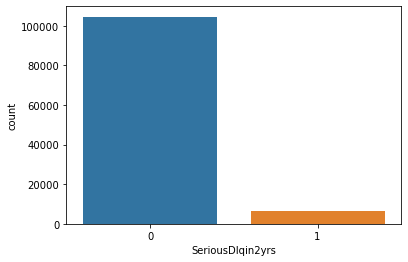

In [28]:
#查看data中的SeriousDlqin2yrs分布情况
plt.figure()
sns.countplot('SeriousDlqin2yrs',data=data)

In [29]:
#data中违约率的分布是很不均衡的,属于imbalanced classification问题
P = data.groupby('SeriousDlqin2yrs')['ID'].count().reset_index()
P['Percentage'] = 100 * P['ID'] / P['ID'].sum()
print (P)

   SeriousDlqin2yrs      ID  Percentage
0                 0  104619   94.038705
1                 1    6632    5.961295


In [30]:
n=list(data)
print(n)

['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


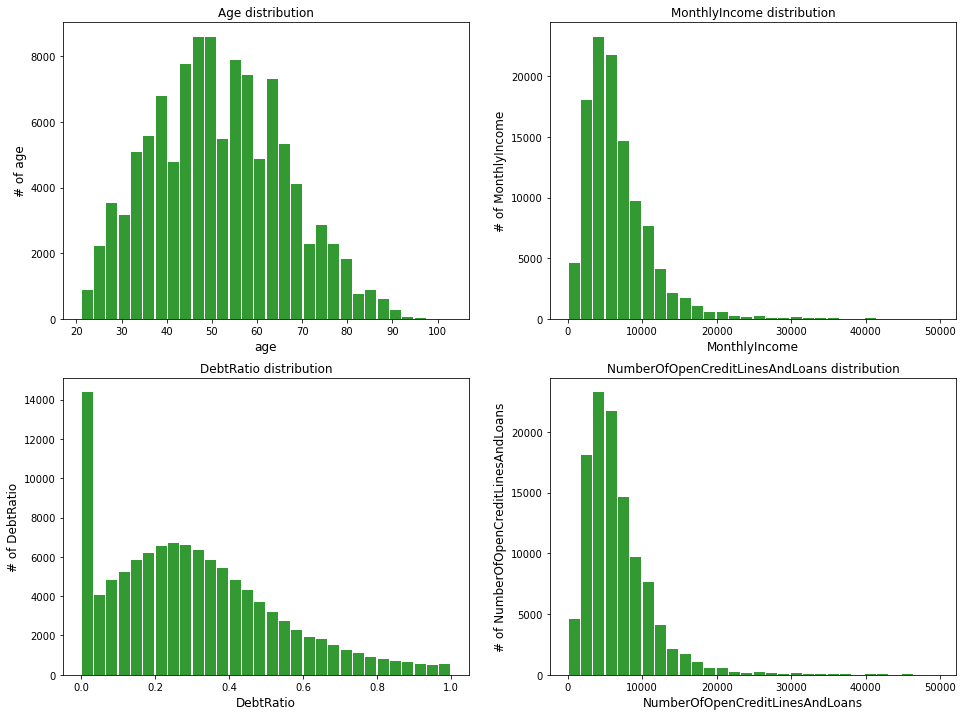

In [31]:
#发现年龄和月收入的分布情况近似于正态分布，符合一般的统计假设
plt.figure(figsize=(16,12))
bins=30

plt.subplot(221)
ax1= plt.hist(data.age, bins, color="green", alpha=0.8,rwidth=0.9)
plt.title("Age distribution")
plt.ylabel('# of age', fontsize=12)
plt.xlabel('age', fontsize=12)


plt.subplot(222)
ax2= plt.hist(data.MonthlyIncome,bins,color="green",alpha=0.8,rwidth=0.9)
plt.title("MonthlyIncome distribution")
plt.ylabel('# of MonthlyIncome', fontsize=12)
plt.xlabel('MonthlyIncome', fontsize=12)

plt.subplot(223)
ax2= plt.hist(data.DebtRatio,bins,color="green",alpha=0.8,rwidth=0.9)
plt.title("DebtRatio distribution")
plt.ylabel('# of DebtRatio', fontsize=12)
plt.xlabel('DebtRatio', fontsize=12)

plt.subplot(224)
ax2= plt.hist(data.MonthlyIncome,bins,color="green",alpha=0.8,rwidth=0.9)
plt.title("NumberOfOpenCreditLinesAndLoans distribution")
plt.ylabel('# of NumberOfOpenCreditLinesAndLoans', fontsize=12)
plt.xlabel('NumberOfOpenCreditLinesAndLoans', fontsize=12)

plt.show()

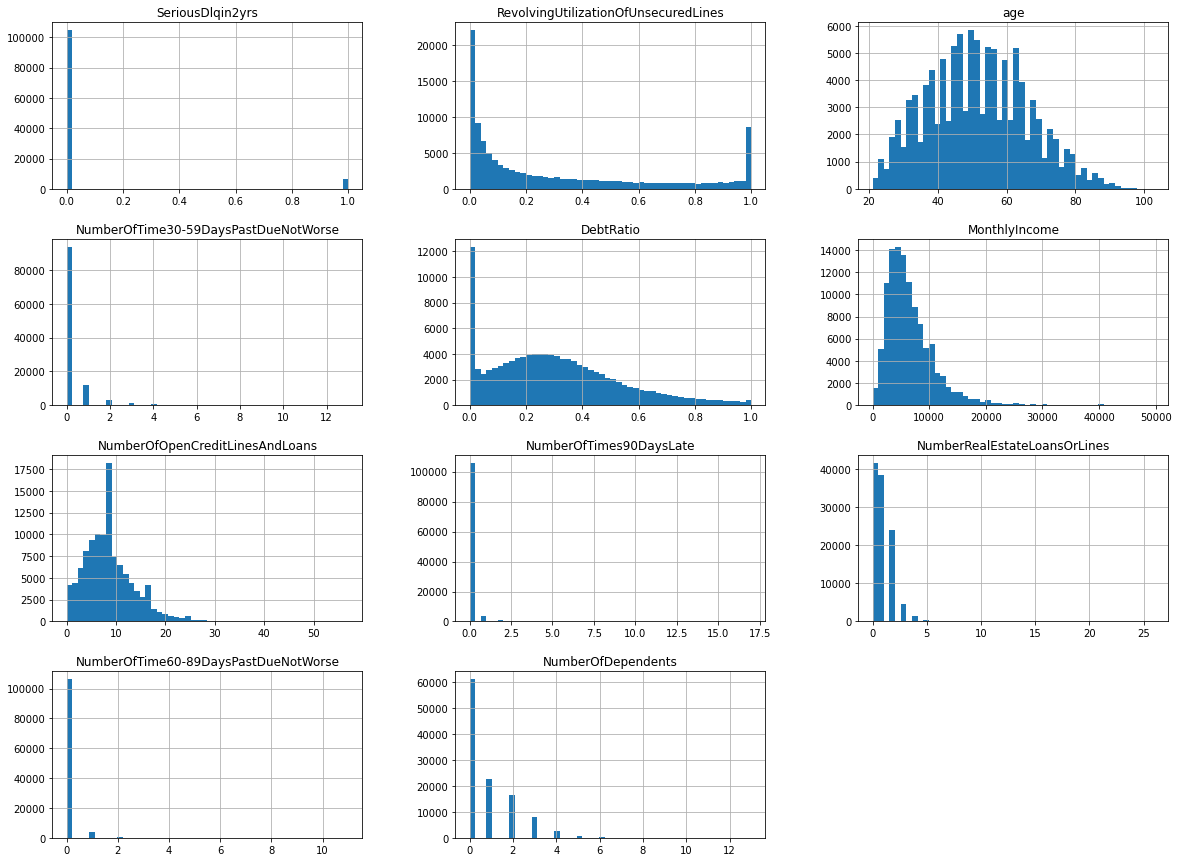

In [32]:
data.drop(['ID'],axis=1).hist(bins=50, figsize=(20,15))
plt.show()

In [33]:
data=data.drop('ID',axis=1)

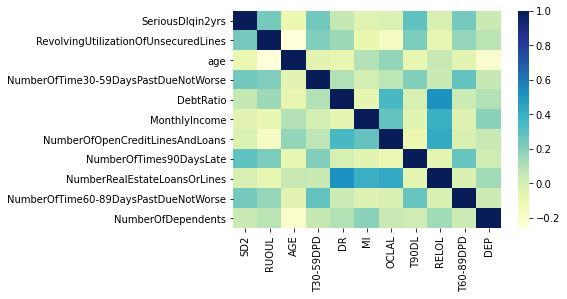

In [34]:
#检查各个变量之间的相关性
corr = data.corr()#计算各变量的相关性系数
xticks = ['SD2','RUOUL','AGE','T30-59DPD','DR','MI','OCLAL','T90DL','RELOL','T60-89DPD','DEP']#x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=False, cmap='YlGnBu', ax=ax1)#绘制相关性系数热力图
ax1.set_xticklabels(xticks, rotation=90, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()


In [35]:
corr.to_csv('corres.csv')

In [36]:
#可以看出和SeriousDlqin2yrs相关性较强的变量为RevolvingUtilizationOfUnsecuredLines	、NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate、NumberOfTime60-89DaysPastDueNotWorse

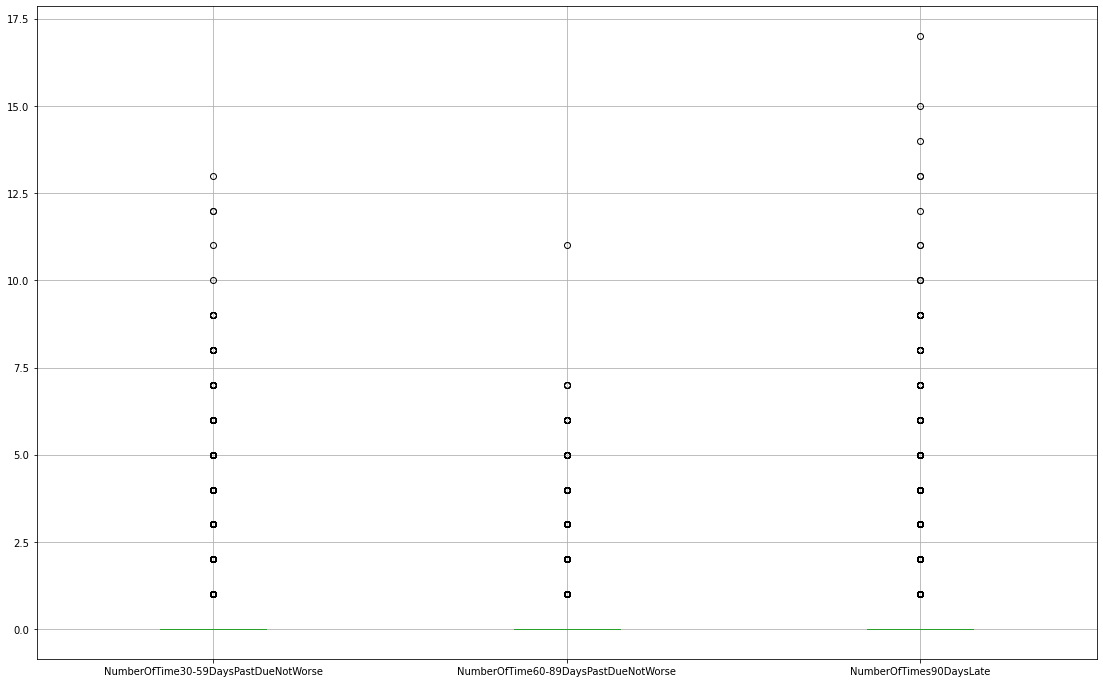

In [37]:
#查看一下NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate、NumberOfTime60-89DaysPastDueNotWorse三者的箱型图
plt.figure(figsize=(19, 12)) 
data[['NumberOfTime30-59DaysPastDueNotWorse', 
          'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate',]].boxplot()
plt.show()